<a href="https://colab.research.google.com/github/sujaljatla/SpamEmailClassification/blob/main/Spam_Email_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#data cleaning and preprocessing
import re
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#model building
from tensorflow.keras.layers import Dense,Embedding,LSTM,Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df_train=pd.read_csv(r"SMS_train.csv",encoding='latin-1')#it supports on non-ascii keywords

In [ ]:
df_train

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


In [ ]:
df_test=pd.read_csv(r"SMS_test.csv",encoding='latin-1')

In [ ]:
df_test

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


## Data-Cleaning & Preprocessing

In [ ]:
#need to drop S.No. column and Label needs to be encoded

In [ ]:
df_train.columns

Index(['S. No.', 'Message_body', 'Label'], dtype='object')

In [ ]:
#By using label encoding techniques also u can try
df_train['Label']=df_train['Label'].map({'Spam':0,'Non-Spam':1})
df_test['Label']=df_test['Label'].map({'Spam':0,'Non-Spam':1})

In [ ]:
df_train

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,1
1,2,The guy did some bitching but I acted like i'd...,1
2,3,"Pity, * was in mood for that. So...any other s...",1
3,4,Will ü b going to esplanade fr home?,1
4,5,This is the 2nd time we have tried 2 contact u...,0
...,...,...,...
952,953,hows my favourite person today? r u workin har...,1
953,954,How much you got for cleaning,1
954,955,Sorry da. I gone mad so many pending works wha...,1
955,956,Wat time ü finish?,1


In [ ]:
df_train = df_train.drop('S. No.', axis=1)
df_test = df_test.drop('S. No.', axis=1)
df_train

,Message_body,Label
0,Rofl. Its true to its name,1
1,The guy did some bitching but I acted like i'd...,1
2,"Pity, * was in mood for that. So...any other s...",1
3,Will ü b going to esplanade fr home?,1
4,This is the 2nd time we have tried 2 contact u...,0
...,...,...
952,hows my favourite person today? r u workin har...,1
953,How much you got for cleaning,1
954,Sorry da. I gone mad so many pending works wha...,1
955,Wat time ü finish?,1


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
STOPWORDS = stopwords.words("english") #it is inbuild stopwords you can build ur own stop words

In [ ]:
def clean(text):
    text = text.lower()
    text = re.sub("(http|https|www)(:|\.)\S+.com"," ",text)
    text = re.sub("[^\w\d]"," ",text)
    text = " ".join([t for t in text.split() if t not in STOPWORDS])
    return text

In [ ]:
check=clean("hello I'm Sharanya! do subscribe to data-discovery")
check

'hello sharanya subscribe data discovery'

In [ ]:
print(df_train.columns)

Index(['Message_body', 'Label'], dtype='object')


In [ ]:
df_train["text"] = df_train["Message_body"].apply(lambda x : clean(x))
df_test["text"] = df_test["Message_body"].apply(lambda x : clean(x))

In [ ]:
df_test

,Message_body,Label,text
0,"UpgrdCentre Orange customer, you may now claim...",0,upgrdcentre orange customer may claim free cam...
1,"Loan for any purpose £500 - £75,000. Homeowner...",0,loan purpose 500 75 000 homeowners tenants wel...
2,Congrats! Nokia 3650 video camera phone is you...,0,congrats nokia 3650 video camera phone call 09...
3,URGENT! Your Mobile number has been awarded wi...,0,urgent mobile number awarded 2000 prize guaran...
4,Someone has contacted our dating service and e...,0,someone contacted dating service entered phone...
...,...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,1,7 wonders world 7th 6th ur style 5th ur smile ...
121,Try to do something dear. You read something f...,1,try something dear read something exams
122,Sun ah... Thk mayb can if dun have anythin on....,1,sun ah thk mayb dun anythin thk book e lesson ...
123,"SYMPTOMS when U are in love: ""1.U like listeni...",1,symptoms u love 1 u like listening songs 2 u g...


In [ ]:
df_train = df_train.drop('Message_body', axis=1)
df_test = df_test.drop('Message_body', axis=1)

In [ ]:
df_test.columns
df_test

,Label,text
0,0,upgrdcentre orange customer may claim free cam...
1,0,loan purpose 500 75 000 homeowners tenants wel...
2,0,congrats nokia 3650 video camera phone call 09...
3,0,urgent mobile number awarded 2000 prize guaran...
4,0,someone contacted dating service entered phone...
...,...,...
120,1,7 wonders world 7th 6th ur style 5th ur smile ...
121,1,try something dear read something exams
122,1,sun ah thk mayb dun anythin thk book e lesson ...
123,1,symptoms u love 1 u like listening songs 2 u g...


## Encoding

In [ ]:
#Word to Vec conversion
vocab_size=5000
ml = 20 #max_length

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(df_train["text"], df_train["Label"], test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(df_train.shape)

(765,)
(957, 2)


In [ ]:
# Convert NumPy array to a list
x_train = x_train.tolist()
df_test.text

0      upgrdcentre orange customer may claim free cam...
1      loan purpose 500 75 000 homeowners tenants wel...
2      congrats nokia 3650 video camera phone call 09...
3      urgent mobile number awarded 2000 prize guaran...
4      someone contacted dating service entered phone...
                             ...                        
120    7 wonders world 7th 6th ur style 5th ur smile ...
121              try something dear read something exams
122    sun ah thk mayb dun anythin thk book e lesson ...
123    symptoms u love 1 u like listening songs 2 u g...
124                 great safe trip dont panic surrender
Name: text, Length: 125, dtype: object

In [ ]:
token = Tokenizer(num_words=vocab_size)
token.fit_on_texts(x_train)

In [ ]:
x_train = token.texts_to_sequences(x_train)
x_val = token.texts_to_sequences(x_val)

In [ ]:
x_train

In [ ]:
print(x_train[1])
print(x_val[1])

[307, 116, 117, 194, 970, 247]
[280]


In [ ]:
#Convert the text into equal dimensions by using padding sequence
x_train = pad_sequences(x_train,truncating="pre",maxlen=ml,padding="pre")
x_val = pad_sequences(x_val,truncating="pre",maxlen=ml,padding="pre")
print(x_train[1])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0 307 116 117 194
 970 247]


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(765, 20)
(765,)
(192, 20)
(192,)


## Model Building

In [ ]:
model = Sequential([

    Embedding(vocab_size,100,input_length=ml), #transforms integer-encoded words into dense, lower-dimensional vectors
    Dropout(0.1),
    LSTM(200),
    Dropout(0.1),
    Dense(1,activation="sigmoid")
])

In [ ]:
#from tensorflow.keras.optimizers import Adam
#model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["acc"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 100)           500000    
                                                                 
 dropout (Dropout)           (None, 20, 100)           0         
                                                                 
 lstm (LSTM)                 (None, 200)               240800    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 741001 (2.83 MB)
Trainable params: 741001 (2.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(x_train.dtype)
print(y_train.dtype)
print(x_val.dtype)
print(y_val.dtype)

int32
int64
int32
int64


In [ ]:
# history = model.fit(x_train,df_train["Label"],batch_size=32,epochs=5,validation_data=(x_test,df_test["Label"]))
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
24/24 [==============================] - 5s 79ms/step - loss: 0.3135 - acc: 0.8719 - val_loss: 0.3634 - val_acc: 0.8854
Epoch 2/5
24/24 [==============================] - 1s 54ms/step - loss: 0.1209 - acc: 0.9752 - val_loss: 0.1869 - val_acc: 0.9531
Epoch 3/5
24/24 [==============================] - 1s 57ms/step - loss: 0.0734 - acc: 0.9895 - val_loss: 0.1624 - val_acc: 0.9375
Epoch 4/5
24/24 [==============================] - 1s 57ms/step - loss: 0.0186 - acc: 0.9935 - val_loss: 0.1549 - val_acc: 0.9531
Epoch 5/5
24/24 [==============================] - 1s 57ms/step - loss: 0.0122 - acc: 0.9961 - val_loss: 0.1185 - val_acc: 0.9583


In [ ]:
df_test

,Label,text
0,0,upgrdcentre orange customer may claim free cam...
1,0,loan purpose 500 75 000 homeowners tenants wel...
2,0,congrats nokia 3650 video camera phone call 09...
3,0,urgent mobile number awarded 2000 prize guaran...
4,0,someone contacted dating service entered phone...
...,...,...
120,1,7 wonders world 7th 6th ur style 5th ur smile ...
121,1,try something dear read something exams
122,1,sun ah thk mayb dun anythin thk book e lesson ...
123,1,symptoms u love 1 u like listening songs 2 u g...


In [ ]:
# Tokenize and pad the sequences for test data
x_test_text = token.texts_to_sequences(df_test.text)
x_test_padded = pad_sequences(x_test_text, truncating="pre", maxlen=ml, padding="pre")

# Predict labels for test data
predictions = model.predict(x_test_padded)

# Convert predicted probabilities to binary labels (0 for spam, 1 for non-spam)
predicted_labels = (predictions > 0.5).astype("int32")


4/4 [==============================] - 0s 14ms/step


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(df_test["Label"].values, predicted_labels)

print("Test Accuracy:", accuracy)

# Display confusion matrix
conf_matrix = confusion_matrix(df_test["Label"].values, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

Test Accuracy: 0.896
Confusion Matrix:
[[63 13]
 [ 0 49]]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

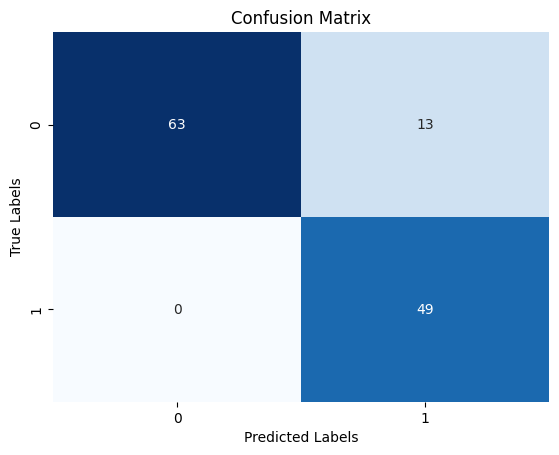

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(df_test["Label"].values, predicted_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

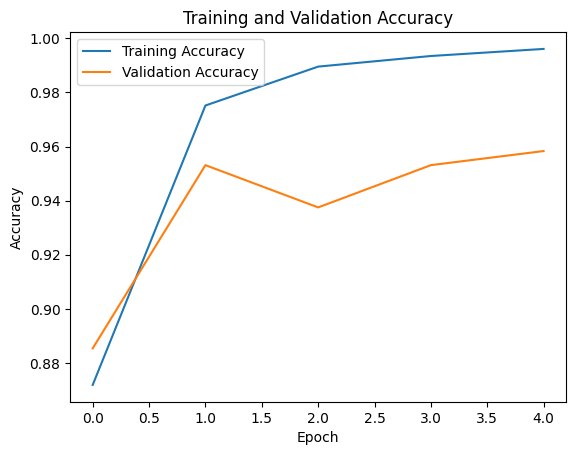

In [ ]:
# Plot accuracy over epochs
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

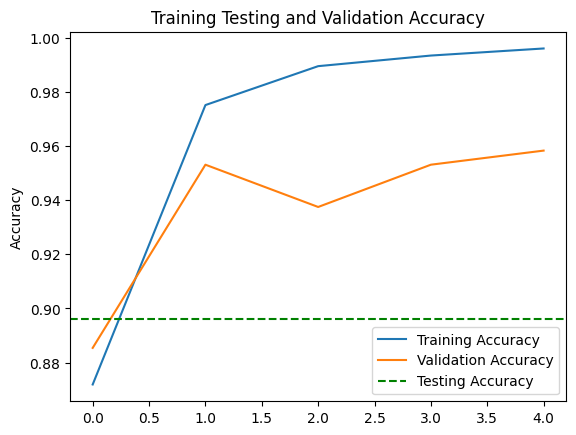

In [ ]:
# Plot accuracy over epochs
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.axhline(y=accuracy, color='g', linestyle='--', label='Testing Accuracy')
plt.ylabel('Accuracy')
plt.title('Training Testing and Validation Accuracy')
plt.legend()
plt.show()